In [38]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [10]:
mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist.data, mnist.target.astype(int)
X = X.to_numpy()
Y = Y.to_numpy()

In [57]:
ZEROS = X[Y == 0]
ONES = X[Y == 1]
data = np.concatenate([ZEROS, ONES])

In [58]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

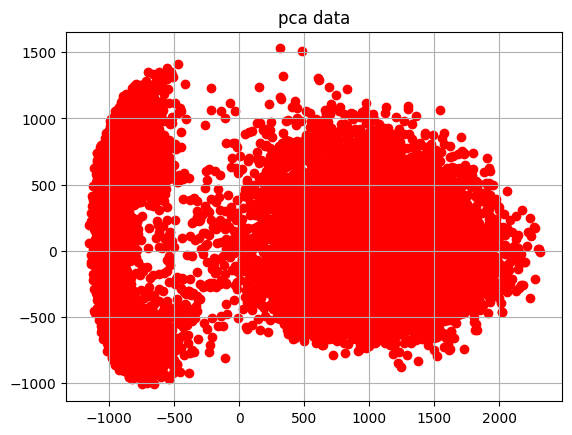

In [59]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], color='red')
plt.grid()
plt.title('pca data')
plt.show()

In [60]:
gmm = GaussianMixture(n_components=2)
gmm.fit(pca_data)

GaussianMixture(n_components=2)

In [61]:
np.sqrt(np.sum(np.power(gmm.means_[0] - gmm.means_[1], 2)))

1915.6759421186396

In [62]:
mean_1_inverse = pca.inverse_transform(gmm.means_[0])
mean_2_inverse = pca.inverse_transform(gmm.means_[1])

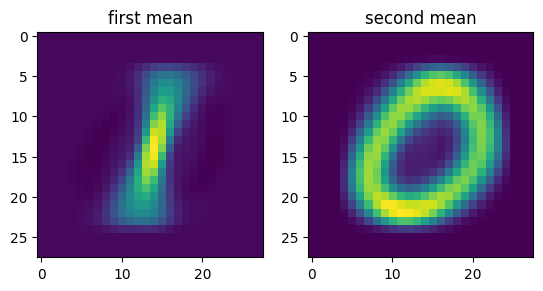

In [63]:
plt.subplot(1, 2, 1)
plt.imshow(mean_1_inverse.reshape(28, 28))
plt.title('first mean')
plt.subplot(1, 2, 2)
plt.imshow(mean_2_inverse.reshape(28, 28))
plt.title('second mean')
plt.show()

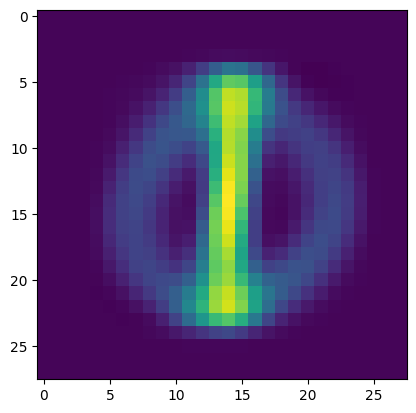

In [79]:
min_distance_idx = np.argsort(np.abs(gmm.predict_proba(pca_data)[:, 0] - gmm.predict_proba(pca_data)[:, 1]))[0]
min_dist_inverse = pca.inverse_transform(pca_data[min_distance_idx])
plt.imshow(min_dist_inverse.reshape(28, 28))
plt.show()